In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('D:/download/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/Combined_Cycle_Power_Plant.csv')
df

,T,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


특징과 라벨 분리

In [7]:
X = df.drop('EP',axis=1)
Y = df['EP']

In [8]:
# 신규데이터 생성
X_added = X.copy()

# 로그와 제곱 관련 변수만 추가
for col in X.columns:
    X_added[col+'_squared'] = X[col] **2
    X_added[col+'_log'] = np.log(X[col])

In [9]:
X_score = cross_val_score(LR(), X, Y, cv = 5, scoring='neg_mean_absolute_error').mean()
X_added_score = cross_val_score(LR(), X_added, Y, cv = 5, scoring = 'neg_mean_absolute_error').mean()

In [10]:
print('특징 추가전 : {}, 특징 추가 후 : {}'.format(X_score, X_added_score))


특징 추가전 : -3.6282513807290444, 특징 추가 후 : -3.3322215067521403


In [20]:
df = pd.read_csv('D:/download/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/glass.csv')
df



,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass_type
0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
1,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
2,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
3,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
4,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.11,1
...,...,...,...,...,...,...,...,...,...
209,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,7
210,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.00,7
211,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,0.00,7
212,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,0.00,7


In [21]:
X= df.drop(['Glass_type'], axis=1)
Y = df['Glass_type']

In [22]:
Train_x, Test_x, Train_y, Test_y = train_test_split(X,Y)
Train_x.shape

(160, 8)

In [23]:
def IQR_rule(val_list):
    # IQR계싼
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3- Q1

    # IQR rule을 위배하지 않는 bool list 계산(True : 이상치 X, False : 이상치 O)
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)

    return  not_outlier_condition

In [24]:
# apply를 이용하여 모든 column에 IQR적용
conditions = Train_x.apply(IQR_rule)
conditions

,RI,Na,Mg,Al,Si,K,Ca,Fe
6,True,True,True,True,True,True,True,True
213,True,True,False,True,True,False,False,True
1,True,True,True,True,True,True,True,True
125,True,True,True,True,True,True,True,True
131,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...
111,True,True,True,True,True,True,True,True
159,False,False,False,True,True,True,False,False
42,True,True,True,True,True,True,True,True
94,True,True,False,False,True,True,True,True


In [25]:
total_condition = conditions.sum(axis=1) == len(Train_x.columns) # 하나라도 이상치 있을 시 제거
Train_x = Train_x[total_condition] # 이상치 제거
Train_x.shape

(107, 8)

In [26]:
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN

In [27]:
DM = cdist(Train_x, Train_x)
np.quantile(DM, 0.1)

0.5293781480005619

In [28]:
cluster_model = DBSCAN(eps=0.67, min_samples=3).fit(Train_x)
print(sum(cluster_model.labels_== -1)) # 8개가 이상치로 판단

6


In [30]:
cluster_model = DBSCAN(eps=2, min_samples=3).fit(Train_x)
print(sum(cluster_model.labels_==-1))

0


In [31]:
Train_x = Train_x[cluster_model.labels_!=-1]

In [32]:
Train_x.shape

(107, 8)

In [35]:
# 특징간 상관 관계 제거
df = pd.read_csv('D:/download/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/abalone.csv')
df

,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [39]:
# 특징과 라벨 분리
X = df.drop(['Age'], axis=1)
Y = df['Age']

In [42]:
Train_x, Test_x, Train_y, Test_y = train_test_split(X,Y)

In [43]:
Train_x.corr()

,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight
Length,1.000000,0.986236,0.805943,0.923227,0.893866,0.901013,0.897861
Diameter,0.986236,1.000000,0.811035,0.923196,0.889383,0.897988,0.904371
Height,0.805943,0.811035,1.000000,0.797364,0.753657,0.777637,0.795288
Wholeweight,0.923227,0.923196,0.797364,1.000000,0.968917,0.966510,0.955627
Shuckedweight,0.893866,0.889383,0.753657,0.968917,1.000000,0.931910,0.882638
Visceraweight,0.901013,0.897988,0.777637,0.966510,0.931910,1.000000,0.907899
Shellweight,0.897861,0.904371,0.795288,0.955627,0.882638,0.907899,1.000000


In [44]:
# VIF계산
from sklearn.linear_model import LinearRegression as LR
VIF_dict = dict()
for col in Train_x.columns:
    model = LR().fit(Train_x.drop([col], axis=1), Train_x[col])
    r2 = model.score(Train_x.drop([col], axis =1), Train_x[col])
    VIF = 1 / (1-r2)
    VIF_dict[col] = VIF

In [45]:
VIF_dict # Height를 제외하고는 모두 높아 사용불가

{'Length': 38.872434535900894,
 'Diameter': 39.64877955212741,
 'Height': 3.1387626010606047,
 'Wholeweight': 107.37840005309184,
 'Shuckedweight': 27.399484268178263,
 'Visceraweight': 17.34417519613406,
 'Shellweight': 21.048353365655597}

In [48]:
# 전체 특징을 모두 사용
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.metrics import mean_absolute_error as MAE

model = MLP(random_state=42, max_iter=500)
model.fit(Train_x, Train_y)
pred_y = model.predict(Test_x)
score = MAE(Test_y, pred_y)
print(score)

1.6196796113738334


In [49]:
# VIF점수가 30점 미만인 특징만 사용
selected_feature = [key for key, val in VIF_dict.items() if val < 30]
model = MLP(random_state=42, max_iter=500)
model.fit(Train_x[selected_feature], Train_y)
pred_y = model.predict(Test_x[selected_feature])
score = MAE(Test_y, pred_y)
print(score)

1.6603472857401298


In [51]:
# PCA 사용
from sklearn.decomposition import PCA
PCA_model = PCA(n_components = 3).fit(Train_x)
Train_z = PCA_model.transform(Train_x)
Test_z = PCA_model.transform(Test_x)

Train_z.shape

(3132, 3)

In [52]:
model = MLP(random_state=42, max_iter=500)
model.fit(Train_z, Train_y)
pred_y = model.predict(Test_z)
score = MAE(Test_y, pred_y)
print(score)

1.5268756566922457


In [53]:
# 변수 치우침 제거
df = pd.read_csv('D:/download/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/Sonar_Mines_Rocks.csv')
df

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60,Y
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,R
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.019,0.035,0.017,0.018,0.039,0.163,0.203,0.169,0.233,0.268,...,0.012,0.010,0.020,0.003,0.010,0.006,0.012,0.019,0.016,M
204,0.032,0.010,0.030,0.056,0.076,0.096,0.099,0.102,0.103,0.215,...,0.006,0.009,0.014,0.006,0.006,0.003,0.003,0.006,0.007,M
205,0.052,0.044,0.018,0.029,0.035,0.117,0.126,0.118,0.126,0.253,...,0.016,0.003,0.005,0.006,0.009,0.014,0.014,0.008,0.003,M
206,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.194,0.235,...,0.009,0.005,0.013,0.004,0.004,0.003,0.008,0.004,0.005,M


In [54]:
# 특징과 라벨 분리
x = df.drop(['Y'], axis = 1)
y = df['Y']

In [55]:
train_x, test_x, train_y, test_y = train_test_split(x,y)

In [57]:
# 왜도 확인
train_x.skew()

Band1     2.091266
Band2     2.104696
Band3     2.651423
Band4     3.519357
Band5     2.063107
Band6     1.203396
Band7     0.801714
Band8     1.443737
Band9     1.809100
Band10    1.298067
Band11    0.986138
Band12    0.727031
Band13    0.861406
Band14    0.878651
Band15    0.694952
Band16    0.709676
Band17    0.685912
Band18    0.501022
Band19    0.184244
Band20   -0.172889
Band21   -0.280859
Band22   -0.387702
Band23   -0.640065
Band24   -0.727288
Band25   -0.717330
Band26   -0.562990
Band27   -0.547949
Band28   -0.575549
Band29   -0.303819
Band30   -0.055275
Band31    0.372248
Band32    0.499529
Band33    0.586983
Band34    0.620092
Band35    0.569372
Band36    0.620004
Band37    0.677740
Band38    1.064794
Band39    0.956264
Band40    0.916710
Band41    0.903691
Band42    0.888356
Band43    0.888119
Band44    1.267870
Band45    1.282130
Band46    1.672669
Band47    1.826956
Band48    1.359443
Band49    1.302370
Band50    1.783711
Band51    2.911980
Band52    2.081954
Band53    1.

<AxesSubplot:>

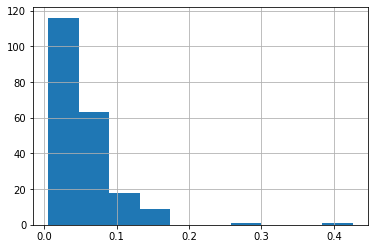

In [58]:
%matplotlib inline
df['Band4'].hist()


In [59]:
# 치우침을 제거했을 때의 성능 비교를 위한 모델 개발
train_y.replace({"M":-1, "R":1}, inplace=True)
test_y.replace({"M":-1, "R":1}, inplace=True)

In [61]:
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier as MLP

model = MLP(random_state=42, max_iter=1000).fit(train_x, train_y)
pred_y = model.predict(test_x)
score = f1_score(test_y, pred_y)
print(score)

0.8571428571428572


In [63]:
# 왜도 기반 치우친 변수 제거
biased_variables = train_x.columns[train_x.skew().abs() > 1.5] # 절대값이 1.5보다 큰 것

# 치우침 제거
train_x[biased_variables] = train_x[biased_variables] - train_x[biased_variables].min()+1
train_x[biased_variables] = np.log10(train_x[biased_variables])

c:\anaconda3\envs\py_37\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [65]:
#치우침 제거 후 모델 평가
model = MLP(random_state=42, max_iter=1000).fit(train_x, train_y)

test_x[biased_variables] = test_x[biased_variables] - test_x[biased_variables].min() +1
test_x[biased_variables] = test_x[biased_variables].apply(np.log)

pred_y = model.predict(test_x)
score = f1_score(test_y, pred_y)
print(score)

0.8260869565217391


c:\anaconda3\envs\py_37\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [66]:
# Scaling
df = pd.read_csv('D:/download/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/baseball.csv')
df

,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary
0,0.271,0.328,74,161,22,6,12,58,49,133,23,17,1,1,0,0,109
1,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0,160
2,0.251,0.338,101,141,35,3,32,105,71,104,34,6,0,0,1,0,2700
3,0.224,0.274,28,94,21,1,1,44,27,54,2,7,1,1,0,0,550
4,0.206,0.262,14,51,18,1,1,28,17,26,0,3,1,1,0,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.269,0.303,32,58,12,1,13,33,11,51,1,2,0,0,0,0,140
333,0.288,0.366,24,47,7,0,7,24,18,23,2,3,0,0,0,0,525
334,0.208,0.265,12,35,11,1,0,15,14,30,2,6,0,0,0,0,365
335,0.290,0.349,59,141,30,2,16,64,42,102,14,6,1,0,0,0,990


In [67]:
# 특징과 라벨 분리
x = df.drop('Salary', axis=1)
y = df['Salary']

In [68]:
train_x, test_x, train_y, test_y = train_test_split(x,y)

In [69]:
# 특징 간 스케일 차이가 큼을 확인 -> 스케일이 작은 특징은 영향을 거의 주지 못할 것이라 예상
train_x.max() - train_x.min()


Batting_average              0.394
On-base_percentage           0.423
Runs                       133.000
Hits                       215.000
Doubles                     49.000
Triples                     15.000
HomeRuns                    44.000
Runs_batted_in             133.000
Walks                      107.000
Strike-Outs                174.000
Stolen_bases                76.000
Errors                      27.000
Free_agency_eligibility      1.000
Free_agent                   1.000
Arbitration_eligibility      1.000
Arbitration                  1.000
dtype: float64

In [70]:
# 스케일링 전 성능 확인
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as MAE
model = KNN().fit(train_x, train_y)
pred_y = model.predict(test_x)

score = MAE(test_y, pred_y)
print(score)

650.3035294117648


In [71]:
# 스케일링 수행
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_x)
s_train_x = scaler.transform(train_x)
s_test_x = scaler.transform(test_x)

model = KNN().fit(s_train_x, train_y)
pred_y = model.predict(s_test_x)

score = MAE(test_y, pred_y)
print(score)

,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary
Batting_average,1.000000,0.805958,0.436742,0.507795,0.451678,0.263797,0.212732,0.369543,0.279894,0.076246,0.200898,0.145369,0.056576,-0.033867,0.096253,0.089347,0.276365
On-base_percentage,0.805958,1.000000,0.513574,0.456606,0.403977,0.198550,0.311210,0.399423,0.590461,0.208266,0.230080,0.095493,0.172196,-0.036850,0.014340,0.047290,0.326676
Runs,0.436742,0.513574,1.000000,0.923172,0.832239,0.549225,0.681058,0.833482,0.828390,0.684897,0.526119,0.342258,0.300376,-0.005505,0.146296,0.132181,0.642903
Hits,0.507795,0.456606,0.923172,1.000000,0.889305,0.544278,0.614003,0.851616,0.723010,0.646258,0.429024,0.415894,0.292663,0.035171,0.188209,0.148373,0.621239
Doubles,0.451678,0.403977,0.832239,0.889305,1.000000,0.416510,0.635149,0.825366,0.640299,0.600701,0.292641,0.339002,0.224679,-0.008239,0.201208,0.157950,0.577423
Triples,0.263797,0.198550,0.549225,0.544278,0.416510,1.000000,0.124683,0.331177,0.307732,0.328983,0.528770,0.198019,0.058901,-0.004357,0.159952,0.100654,0.235242
HomeRuns,0.212732,0.311210,0.681058,0.614003,0.635149,0.124683,1.000000,0.877379,0.624982,0.748820,0.077996,0.152390,0.297976,-0.024819,0.039431,0.037743,0.590454
Runs_batted_in,0.369543,0.399423,0.833482,0.851616,0.825366,0.331177,0.877379,1.000000,0.727056,0.745451,0.205960,0.293055,0.307974,0.024259,0.126549,0.095859,0.668422
Walks,0.279894,0.590461,0.828390,0.723010,0.640299,0.307732,0.624982,0.727056,1.000000,0.666328,0.354829,0.243008,0.351392,0.016568,0.031484,0.040058,0.567085
Strike-Outs,0.076246,0.208266,0.684897,0.646258,0.600701,0.328983,0.748820,0.745451,0.666328,1.000000,0.278649,0.301588,0.225155,-0.009761,0.039207,0.049150,0.405494
